In [83]:
########################libraries #############################################
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
#import seaborn as sns
import random
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import os
import seaborn as sns
from matplotlib import ticker
from matplotlib.ticker import MaxNLocator
import scipy
from random import sample
from Levenshtein import distance
from scipy.spatial.distance import pdist, squareform

%matplotlib inline


In [65]:
def hamming_map(df, title,pep_number,random_sampling=False,save_fig=False):
    """
    
                    
    :param df: given df
    :param pep_number: the number of peptide for the ramdom sampling
    :return: return it's peptide accepted hamming distance map sd a df and it's hamming distance"""
        

    if "probabilty_res_MCMC" in df.columns: #relevant only for simulation outputs
        df = df.loc[df['probabilty_res_MCMC'] == "True"].copy()
        df = df.drop_duplicates(subset="Peptide", keep='first', inplace=False)
    peptide_list = df["Peptide"].tolist()
    if random_sampling:
        peptide_list= sample(peptide_list, pep_number) #creates hamming map for sampled data in selected pep number length
    transformed_strings = np.array(peptide_list).reshape(-1,1) #transform the list into np array 
    distance_matrix = pdist(transformed_strings,lambda x,y: distance(x[0],y[0])) # distances vector
    squared_matrix_np=squareform(distance_matrix)
    plt.figure(figsize=(35,35))
    squared_matrix_pd = pd.DataFrame(data=squared_matrix_np, index=peptide_list, columns=peptide_list)
    ax = sns.heatmap(squared_matrix_pd)
    ax.set_title('hamming heatmap {}'.format(title),fontsize=16)
   # plt.xticks(fontsize=8)
    if save_fig:
        plt.gcf().savefig("Hamming heatmap {}".format(title), dpi=100,bbox_inches='tight')
        plt.close()                     
    return squared_matrix_pd 


In [66]:
iedb_df=pd.read_csv("C:/Users/Elinor/Desktop/תואר שני/thesis_codes/Random_wallk_files/ Simulation Analysis/iedb_epitopes/MHC1 and T cell/MHC1 and t cell pred.csv")


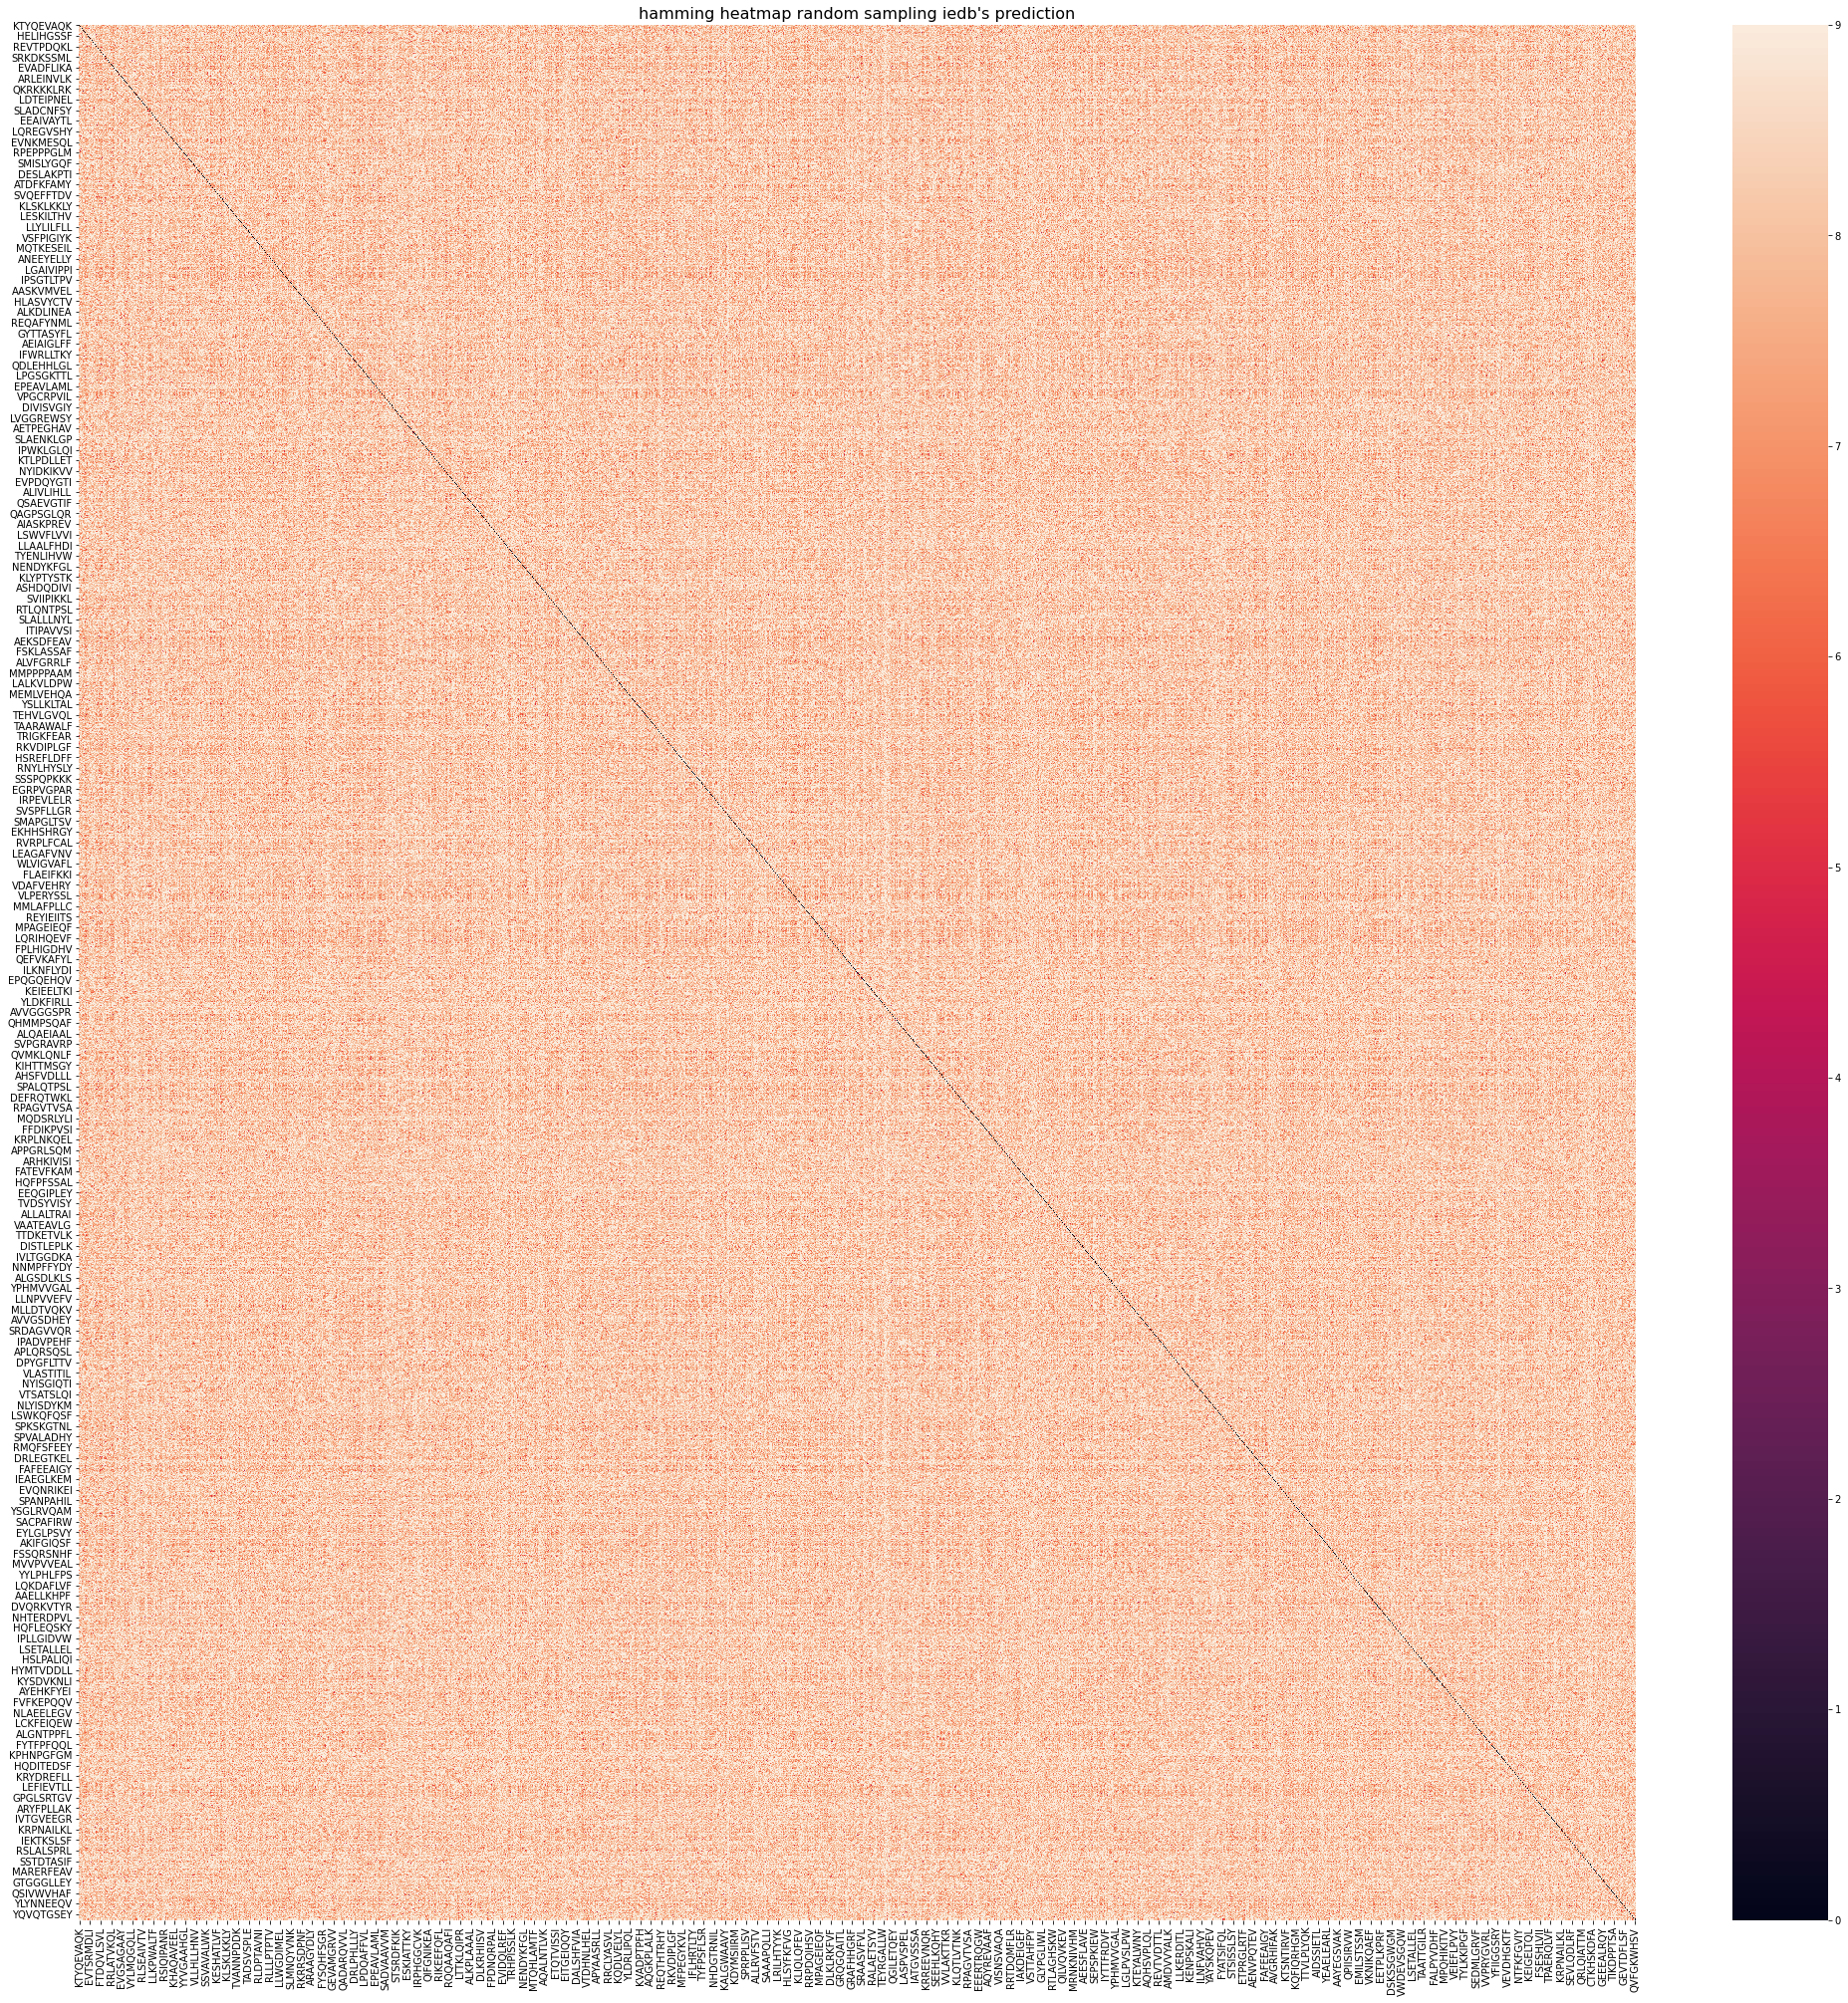

In [67]:
hamming_df=hamming_map(iedb_df,"random sampling iedb's prediction",2500,random_sampling=True,save_fig=False)

In [78]:
def hamming_freq_hist(df,title,save_fig=False,color="m"):
    """gets a df of hamming distances and return it's the distances's count plot 
    """
    hamming_changes=[]
    for i in range(df.shape[0]):
        for j in range(i):
            hamming_changes.append(df.iloc[i, j])
    df[df.eq(0)] = np.nan
    zero_counts = df.isnull().values.sum()
    if zero_counts != df.shape[0]:
        print("check if there is duplicated in the df")
    zero_counts=[0] *zero_counts
    hamming_changes.extend(zero_counts)
    ax = sns.countplot(x=hamming_changes, color=color)     
    ax.set(xlabel="number of changes", ylabel='count')
    ax.set_title('hamming count {}'.format(title))

    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    if  save_fig:
        plt.gcf().savefig("Hamming histogram {}".format(title), dpi=100)
        plt.close()    
        

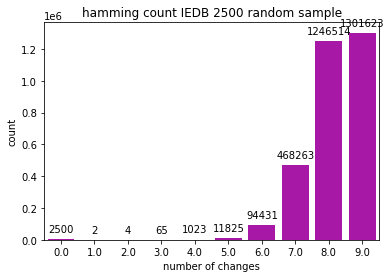

In [82]:
hamming_freq_hist(hamming_df,"IEDB 2500 random sample")